In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
data = pd.read_csv("titanic_train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
target = data.pop("Survived")

In [5]:
feature = data[["Pclass", "Age", "Fare", "SibSp"]]

In [6]:
feature.Age.fillna(feature["Age"].dropna().mean(), inplace=True)

G:\Python\lib\site-packages\pandas\core\generic.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [7]:
feature.describe()

,Pclass,Age,Fare,SibSp
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.523008
std,0.836071,13.002015,49.693429,1.102743
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,22.000000,7.910400,0.000000
50%,3.000000,29.699118,14.454200,0.000000
75%,3.000000,35.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,8.000000


In [8]:
target.reshape(target.size,1)

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [9]:
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, feature, target, cv=4, n_jobs=4, scoring='accuracy' )

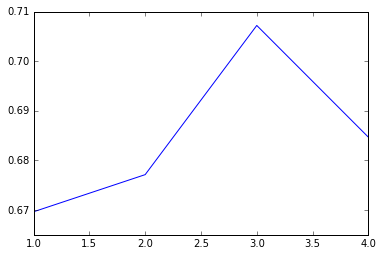

In [43]:
plt.plot([1,2,3,4], scores)

In [11]:
from sklearn.cross_validation import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(feature,target, test_size = .40, random_state=2)

In [13]:
model = RandomForestClassifier()

In [14]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
model.score(x_test, y_test)

0.70028011204481788

In [16]:
scores

array([ 0.66964286,  0.67713004,  0.70720721,  0.68468468])

In [17]:
model.feature_importances_

array([ 0.0768115 ,  0.39736454,  0.46474717,  0.06107678])

In [29]:
help(model.oob_score)

Help on bool object:

class bool(int)
 |  bool(x) -> bool
 |  
 |  Returns True when the argument x is true, False otherwise.
 |  The builtins True and False are the only two instances of the class bool.
 |  The class bool is a subclass of the class int, and cannot be subclassed.
 |  
 |  Method resolution order:
 |      bool
 |      int
 |      object
 |  
 |  Methods defined here:
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __or__(self, value, /)
 |      Return self|value.
 |  
 |  __rand__(self, value, /)
 |      Return value&self.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __ror__(self, value, /)
 |      Return value|self.
 |  
 |  __rxor__(self, value, /)
 |      Return value^self.
 |  
 |  __str__(self, /)
 |      Return str(self).
 |  
 |  __xor__(self, value, /)
 |      Return self^value.
 |  
 |  -----

In [35]:
trees = range(25)
accuracy = np.zeros(25)
len(trees)

25

In [38]:
from sklearn.metrics import accuracy_score

In [40]:
for i in range(len(trees)):
    classifier = RandomForestClassifier(n_estimators=i+1)
    classifier.fit(x_train, y_train)
    predictions = classifier.predict(x_test)
    accuracy[i] = accuracy_score(y_test, predictions)

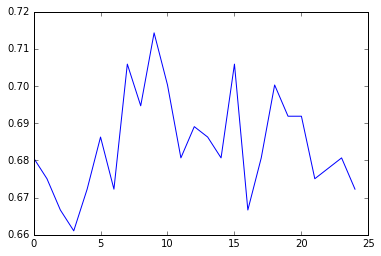

In [42]:
plt.plot(trees, accuracy)